### Подключение пакетов и загрузка данных

In [44]:
import pandas as pd
import numpy as np
diabetes_df = pd.read_csv("diabetes_clean.csv")
diabetes_df = diabetes_df[diabetes_df["bmi"] > 0]
diabetes_df = diabetes_df[diabetes_df["glucose"] > 0]
diabetes_df = diabetes_df[diabetes_df["insulin"] > 0]
print(diabetes_df.head())

    pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
3             1       89         66       23       94  28.1  0.167   21   
4             0      137         40       35      168  43.1  2.288   33   
6             3       78         50       32       88  31.0  0.248   26   
8             2      197         70       45      543  30.5  0.158   53   
13            1      189         60       23      846  30.1  0.398   59   

    diabetes  
3          0  
4          1  
6          1  
8          1  
13         1  


### Разбивка на целевую переменную и массив признаков

In [31]:
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"]

### Предсказание по одной переменной

In [32]:
X_bmi = X[:, 4]
print(y.shape, X_bmi.shape)
print(X_bmi)

(392,) (392,)
[28.1 43.1 31.  30.5 30.1 25.8 45.8 43.3 34.6 39.3 36.6 31.1 23.2 22.2
 31.6 24.8 24.  37.1 34.  45.4 19.4 24.2 24.4 33.7 34.7 37.7 46.8 41.5
 25.4 19.6 28.9 32.9 28.6 35.1 29.3 32.4 38.5 37.1 32.  46.7 24.7 33.9
 20.4 28.7 49.7 26.6 28.7 29.5 34.3 37.4 33.3 34.  31.2 30.5 23.2 53.2
 33.6 55.  42.9 33.3 34.5 29.7 34.5 21.1 33.8 30.8 28.7 36.9 32.5 32.8
 30.5 37.4 34.3 40.6 24.6 25.2 29.  40.9 37.2 44.2 29.9 28.4 35.4 43.5
 29.7 32.7 67.1 34.9 30.1 32.  27.9 31.6 33.1 39.4 22.9 34.8 30.9 20.4
 37.7 37.5 33.2 42.6 34.2 41.8 35.8 30.  34.6 28.8 23.6 34.6 36.7 45.2
 46.2 25.4 29.7 35.9 33.1 27.1 38.2 52.3 35.4 24.4 27.6 25.9 33.3 30.9
 33.6 25.2 33.2 40.5 27.8 25.3 35.9 32.4 26.  38.7 45.6 20.8 36.1 36.9
 36.6 43.3 40.5 35.5 28.  30.7 36.6 31.6 35.8 39.7 25.5 24.8 30.5 32.9
 39.4 26.6 29.5 34.1 19.3 38.1 27.5 26.8 25.6 35.1 45.5 30.8 32.7 23.9
 47.9 34.2 25.9 25.9 38.5 28.7 21.8 27.2 33.3 35.3 36.5 31.2 34.9 34.
 27.5 32.8 38.4 35.8 34.9 36.2 39.2 25.2 37.2 43.4 30.8 25.4 25.

In [33]:
X_bmi = X_bmi.reshape(-1,1)
print(X_bmi.shape)
print(X_bmi)

(392, 1)
[[28.1]
 [43.1]
 [31. ]
 [30.5]
 [30.1]
 [25.8]
 [45.8]
 [43.3]
 [34.6]
 [39.3]
 [36.6]
 [31.1]
 [23.2]
 [22.2]
 [31.6]
 [24.8]
 [24. ]
 [37.1]
 [34. ]
 [45.4]
 [19.4]
 [24.2]
 [24.4]
 [33.7]
 [34.7]
 [37.7]
 [46.8]
 [41.5]
 [25.4]
 [19.6]
 [28.9]
 [32.9]
 [28.6]
 [35.1]
 [29.3]
 [32.4]
 [38.5]
 [37.1]
 [32. ]
 [46.7]
 [24.7]
 [33.9]
 [20.4]
 [28.7]
 [49.7]
 [26.6]
 [28.7]
 [29.5]
 [34.3]
 [37.4]
 [33.3]
 [34. ]
 [31.2]
 [30.5]
 [23.2]
 [53.2]
 [33.6]
 [55. ]
 [42.9]
 [33.3]
 [34.5]
 [29.7]
 [34.5]
 [21.1]
 [33.8]
 [30.8]
 [28.7]
 [36.9]
 [32.5]
 [32.8]
 [30.5]
 [37.4]
 [34.3]
 [40.6]
 [24.6]
 [25.2]
 [29. ]
 [40.9]
 [37.2]
 [44.2]
 [29.9]
 [28.4]
 [35.4]
 [43.5]
 [29.7]
 [32.7]
 [67.1]
 [34.9]
 [30.1]
 [32. ]
 [27.9]
 [31.6]
 [33.1]
 [39.4]
 [22.9]
 [34.8]
 [30.9]
 [20.4]
 [37.7]
 [37.5]
 [33.2]
 [42.6]
 [34.2]
 [41.8]
 [35.8]
 [30. ]
 [34.6]
 [28.8]
 [23.6]
 [34.6]
 [36.7]
 [45.2]
 [46.2]
 [25.4]
 [29.7]
 [35.9]
 [33.1]
 [27.1]
 [38.2]
 [52.3]
 [35.4]
 [24.4]
 [27.6]
 [25.9]

### Просмотр данных (глюкоза / ИМТ)

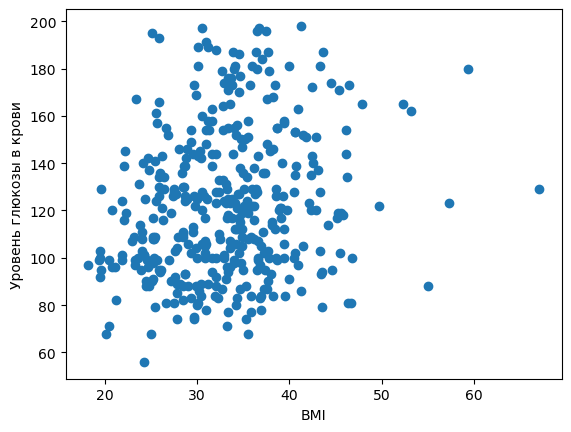

In [34]:
import matplotlib.pyplot as plt
plt.scatter(X_bmi, y)
plt.ylabel("Уровень глюкозы в крови")
plt.xlabel("BMI")
plt.show()

 ### Создание и обучение модели

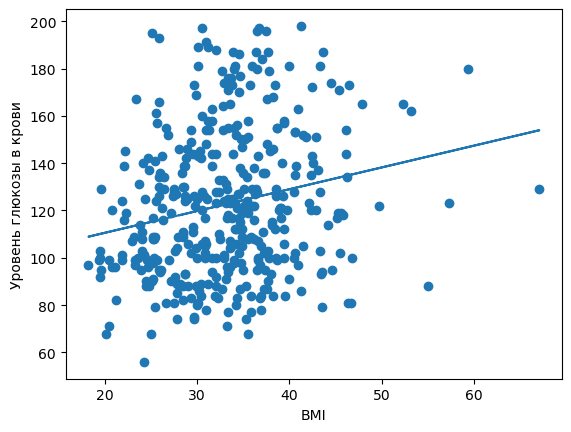

In [35]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions)
plt.ylabel("Уровень глюкозы в крови")
plt.xlabel("BMI")
plt.show()

### Линейная регрессия для множества признаков

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

### Оценка R-квадрат

In [37]:
reg_all.score(X_test, y_test)

0.5094667868757332

### RMSE

In [38]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

22.14632133316733

### Кроссвалидация

In [41]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits = 6, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv = kf)

In [42]:
print(cv_results)

[0.56229699 0.44614407 0.21983567 0.45936666 0.48559491 0.49500658]


In [45]:
print(np.mean(cv_results), np.std(cv_results))

0.44470747876343325 0.1070929205920518


In [48]:
print(np.quantile(cv_results, [0.025, 0.975]))

[0.24812422 0.55388569]


### Гребневая регрессия

In [49]:
from sklearn.linear_model import Ridge
scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
print(scores)

[0.509576405884622, 0.510493224165769, 0.5148218853400626, 0.49261795851053347, 0.4588698098088013]


### Лассо регерссия

In [50]:
from sklearn.linear_model import Lasso
scores = []
for alpha in [0.01, 0.1, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
print(scores)

[0.5096772969868644, 0.5111484584535526, 0.514524365485503, 0.44260019941345585, 0.4312044757453073, 0.38888803499352564]


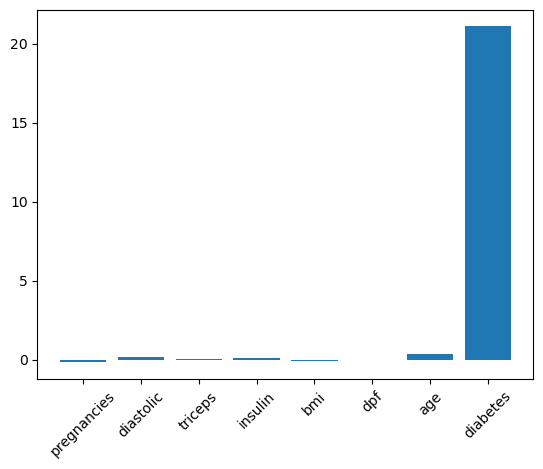

In [56]:
from sklearn.linear_model import Lasso
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"]
names = diabetes_df.drop("glucose", axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()